In [11]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

data = pd.read_pickle('../Downloads/BikesDataVars_new.pkl')
data.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [29]:
temp_mean = data.groupby(data['Date'].dt.week)['Temperature'].mean()
bikes_sum = data.groupby(data['Date'].dt.week)['Rental Count'].sum()

bikes_week = pd.concat([temp_mean, bikes_sum], axis=1)

In [30]:
first_five = bikes_week.iloc[:5]
first_five

,Temperature,Rental Count
Date,,
1,-2.694940,39441
2,-5.079762,30871
3,2.662500,42193
4,-10.038690,23079
5,-5.650595,28415


In [31]:
first_five['x-Mx'] = first_five['Temperature'] - first_five['Temperature'].mean()
first_five['y-My'] = first_five['Rental Count'] - first_five['Rental Count'].mean()

first_five

,Temperature,Rental Count,x-Mx,y-My
Date,,,,
1,-2.694940,39441,1.465357,6641.2
2,-5.079762,30871,-0.919464,-1928.8
3,2.662500,42193,6.822798,9393.2
4,-10.038690,23079,-5.878393,-9720.8
5,-5.650595,28415,-1.490298,-4384.8


In [32]:
SSx = (first_five['x-Mx'] ** 2).sum()
SSy = (first_five['y-My'] ** 2).sum()
SP = (first_five['x-Mx'] * first_five['y-My']).sum()
print(SSx, SSy, SP)

86.31974305555556 249778436.8 139270.43345238097


In [33]:
r = SP / np.sqrt(SSx * SSy)
r

0.9484760874616524

In [34]:
first_five['Temperature'].corr(first_five['Rental Count'])

0.9484760874616526

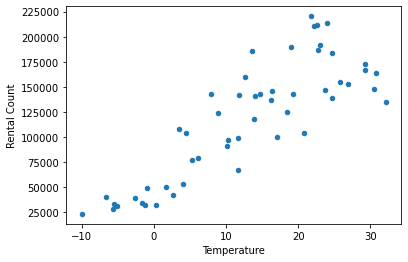

In [35]:
bikes_week.plot('Temperature', 'Rental Count', kind='scatter');

In [36]:
bikes_week['Temperature'].corr(bikes_week['Rental Count'])

0.8458075200534891

In [37]:
data.corr()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Functioning Day,Rental Count,Normal Humidity,Good Weather
Hour,1.000000e+00,0.123610,-0.241644,0.285197,0.008715,-0.021516,-1.391486e-16,0.005439,0.345622,0.107503,0.073698
Temperature,1.236105e-01,1.000000,0.159793,-0.036418,0.050758,-0.217846,-5.570102e-02,-0.049849,0.454749,0.025467,0.206979
Humidity,-2.416438e-01,0.159793,1.000000,-0.336683,0.236397,0.108183,-5.027765e-02,-0.020800,-0.169085,-0.285947,-0.115874
Wind speed,2.851967e-01,-0.036418,-0.336683,1.000000,-0.019674,-0.003554,2.301677e-02,0.005037,0.097583,0.074964,0.032127
Rainfall,8.714642e-03,0.050758,0.236397,-0.019674,1.000000,0.008500,-1.426911e-02,0.002055,-0.103519,-0.095339,-0.042127
Snowfall,-2.151645e-02,-0.217846,0.108183,-0.003554,0.008500,1.000000,-1.259072e-02,0.032089,-0.120869,-0.067939,-0.054942
Holiday,-1.391486e-16,-0.055701,-0.050278,0.023017,-0.014269,-0.012591,1.000000e+00,-0.027624,-0.068822,-0.020156,0.029008
Functioning Day,5.439377e-03,-0.049849,-0.020800,0.005037,0.002055,0.032089,-2.762445e-02,1.000000,0.173437,0.002488,-0.101806
Rental Count,3.456218e-01,0.454749,-0.169085,0.097583,-0.103519,-0.120869,-6.882160e-02,0.173437,1.000000,0.128521,0.194224
Normal Humidity,1.075026e-01,0.025467,-0.285947,0.074964,-0.095339,-0.067939,-2.015629e-02,0.002488,0.128521,1.000000,0.440102


In [38]:
humidity = data.groupby(data['Date'].dt.week)['Humidity'].mean()
wind_speed = data.groupby(data['Date'].dt.week)['Wind speed'].mean()

bikes_week = pd.concat([bikes_week, humidity, wind_speed], axis=1)

In [39]:
bikes_week.corr()

,Temperature,Rental Count,Humidity,Wind speed
Temperature,1.000000,0.845808,0.584642,-0.420474
Rental Count,0.845808,1.000000,0.389963,-0.434142
Humidity,0.584642,0.389963,1.000000,-0.456225
Wind speed,-0.420474,-0.434142,-0.456225,1.000000


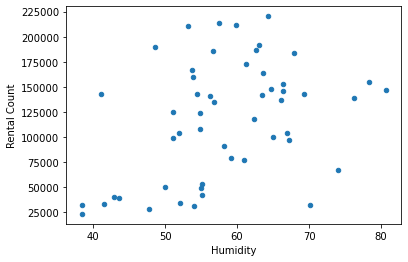

In [40]:
bikes_week.plot('Humidity', 'Rental Count', kind='scatter');

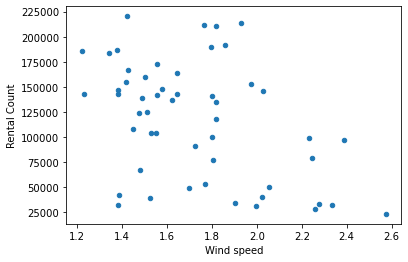

In [41]:
bikes_week.plot('Wind speed', 'Rental Count', kind='scatter');

In [43]:
bikes_week.corr()['Rental Count'].apply(np.abs).sort_values()

Humidity        0.389963
Wind speed      0.434142
Temperature     0.845808
Rental Count    1.000000
Name: Rental Count, dtype: float64

In [44]:
dt = pd.DataFrame({'A': [13, 21, 30, 65, 50], 'B': [200, 90, 10, 83, 12]})
dt

,A,B
0,13,200
1,21,90
2,30,10
3,65,83
4,50,12


In [45]:
dt['A'].corr(dt['B'])

-0.5065445406508795

In [46]:
SG = pd.read_csv('../Downloads/ScrabbleGames.csv')
SG.head()

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon,year
0,451519,1590,0,38,Matt Laufer,0,1892,1877,5,608,Pam Grazette,0,1712,1692,14,1,1,1994-03-11,0,1994
1,451520,1590,0,38,Matt Laufer,0,1892,1877,5,82,Sally Ricketts,0,1390,1347,36,3,1,1994-03-11,0,1994
2,451521,1590,0,38,Matt Laufer,0,1892,1877,5,4001,James Guillot,0,1712,1700,22,5,1,1994-03-11,0,1994
3,451522,1590,0,38,Matt Laufer,0,1892,1877,5,5676,Rhoda Squires,0,1642,1591,29,8,1,1994-03-11,0,1994
4,451523,1590,0,38,Matt Laufer,0,1892,1877,5,4001,James Guillot,0,1712,1700,22,9,1,1994-03-11,0,1994


In [50]:
SG.groupby('tourneyid')['winnerscore'].mean().corr(SG.groupby('tourneyid')['winnernewrating'].mean())

-0.6040132147335744

In [52]:
SG.groupby('tourneyid')['winnerscore'].mean().corr(SG.groupby('tourneyid')['loserscore'].mean())

0.9999382016001124

In [53]:
SG[['gameid', 'tie', 'winnerid', 'loserid', 'loserpos', 'winnerpos']].corr()

,gameid,tie,winnerid,loserid,loserpos,winnerpos
gameid,1.000000,0.011730,0.226863,0.250447,0.031006,0.026757
tie,0.011730,1.000000,-0.018818,0.012602,-0.002666,0.011076
winnerid,0.226863,-0.018818,1.000000,0.190702,-0.011044,0.026496
loserid,0.250447,0.012602,0.190702,1.000000,0.025844,-0.005181
loserpos,0.031006,-0.002666,-0.011044,0.025844,1.000000,0.772008
winnerpos,0.026757,0.011076,0.026496,-0.005181,0.772008,1.000000


In [63]:
SG.groupby('tourneyid')['winnernewrating'].mean().corr(SG.groupby('tourneyid')['losernewrating'].mean())

0.9783569191327567

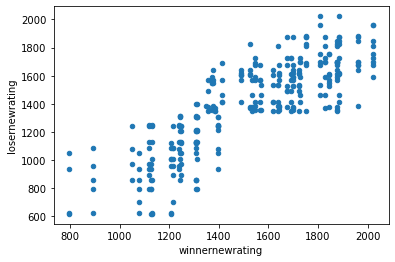

In [62]:
SG.iloc[:300].plot('winnernewrating', 'losernewrating', kind='scatter');

In [77]:
SG.groupby('tourneyid')['winnerscore'].mean().iloc[:10].corr(SG.groupby('tourneyid')['loserscore'].mean().iloc[:10])

0.9999999999999998

In [78]:
SG.groupby('tourneyid')['winnernewrating'].mean().corr(SG.groupby('tourneyid')['losernewrating'].mean())

0.9783569191327567

In [86]:
SG[SG['winnerid'] == 727]

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon,year
644,452163,1591,0,727,Lester Schonbrun,0,1982,1970,7,454,Mary Rhoades,0,1720,1610,53,1,1,1994-07-07,0,1994
645,452164,1591,0,727,Lester Schonbrun,0,1982,1970,7,3429,Craig Atterbury,0,1779,1769,43,2,1,1994-07-07,0,1994
646,452165,1591,0,727,Lester Schonbrun,0,1982,1970,7,2095,Helaine Garren,0,1645,1707,32,5,1,1994-07-07,0,1994
647,452166,1591,0,727,Lester Schonbrun,0,1982,1970,7,299,Steve Polatnick,0,2031,2014,8,6,1,1994-07-07,0,1994
648,452167,1591,0,727,Lester Schonbrun,443,1982,1970,7,1525,Jim Kramer,370,1985,1956,13,9,1,1994-07-07,0,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16764,707136,2970,0,727,Lester Schonbrun,0,1936,1937,15,1489,John Luebkemann,0,1905,1850,22,14,1,1994-03-25,0,1994
16766,707138,2970,0,727,Lester Schonbrun,0,1936,1937,15,1974,Bob Lipton,0,1996,2003,1,17,1,1994-03-25,0,1994
16767,707139,2970,0,727,Lester Schonbrun,439,1936,1937,15,586,Robert Linn,320,1806,1832,3,18,1,1994-03-25,0,1994
30525,1437035,3045,0,727,Lester Schonbrun,0,1988,2005,2,3430,Ruth Sparer Stern,0,1851,1781,31,8,1,1994-12-02,0,1994


In [92]:
SG[SG['winnername'] == 'Lester Schonbrun']['winnerscore'].corr(SG[SG['winnername'] == 'Lester Schonbrun']['winneroldrating'])

0.03153355860802907

In [93]:
SG[SG['winnername'] == 'Stuart Goldman']['winnerscore'].corr(SG[SG['winnername'] == 'Stuart Goldman']['winneroldrating'])

-0.19050879558216424

In [ ]:
SG[SG['tourneyid'] == 4376][]